# Exercises for Lecture 13 (Training deep neural networks)

In [1]:
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Exercise 1: Build a deep neural network with ELU activation functions and batch normalisation and apply it to fashion MINST.

How good of an accuracy can you achieve on the test set?

In [2]:
import tensorflow as tf
from tensorflow import keras
from functools import partial

# to make this notebook's output stable across runs
def reset_state(seed=42):
    tf.keras.backend.clear_session()
    tf.random.set_seed(seed)
    np.random.seed(seed)

reset_state()
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 activation="elu",
                                 kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.legacy.SGD(lr=1e-3),
              metrics=["accuracy"])

c:\Users\benny\anaconda3\envs\mlbd\Lib\site-packages\keras\src\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 batch_normalization_1 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 100)               1

In [5]:
epochs = 10
history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 16s 7ms/step - loss: 1.1723 - accuracy: 0.6127 - val_loss: 0.6348 - val_accuracy: 0.7856
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7718 - accuracy: 0.7385 - val_loss: 0.5250 - val_accuracy: 0.8196
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6924 - accuracy: 0.7613 - val_loss: 0.4857 - val_accuracy: 0.8346
Epoch 4/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6379 - accuracy: 0.7766 - val_loss: 0.4562 - val_accuracy: 0.8388
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5986 - accuracy: 0.7899 - val_loss: 0.4369 - val_accuracy: 0.8456
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5827 - accuracy: 0.7942 - val_loss: 0.4256 - val_accuracy: 0.8478
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5628 - accuracy: 0.8029 - val_loss: 0.4149 - val_accu

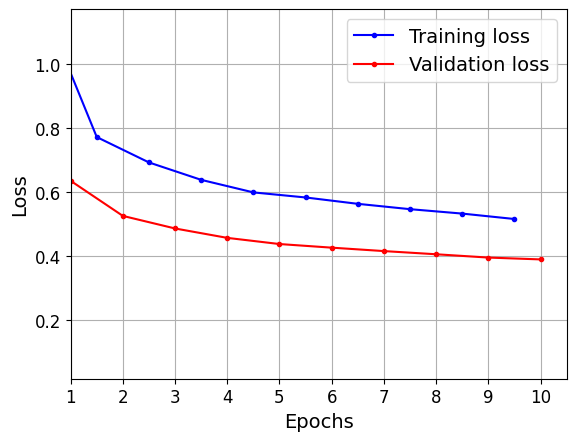

In [6]:
def plot_learning_curves(loss, val_loss):
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.axis([1, len(loss)+0.5, min(loss)-0.5, max(loss)])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [7]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4257 - accuracy: 0.8446


[0.42572084069252014, 0.8446000218391418]